# GSB 545 - Final Project
### CNN Image Classification
Name: Nathan Diekema  
Date: 6/6/2022

**Objective**: The goal of this project is to design and build a CNN to effectively classify vegetables from images.
  \
  \
  
The dataset used for this project can be found here: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/code
  \
  \
  
I downloaded the dataset remotely from kaggle using an API key so some of this code may not work for other people. To make it work you need to mount your drive and put the Kaggle.json API key into your root folder.

In [2]:
# All necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import glob as gb
import random
import seaborn as sns
import sklearn.metrics as metrics

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

#### Download and Explore the Data

In [3]:
# First step is remotely downloading datasets from kaggle using API key
# > Need to upload the kaggle.json API key file to the working directory
! pip install kaggle
! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json # Use this to access kaggle.json in drive
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! kaggle datasets download misrakahmed/vegetable-image-dataset

100% 533M/534M [00:28<00:00, 15.7MB/s]
100% 534M/534M [00:28<00:00, 19.9MB/s]


In [5]:
! unzip vegetable-image-dataset

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

## **Create Dataset**

In [6]:
# Define parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

In [7]:
# Paths to the datasets in my gdrive
train_dir='/content/Vegetable Images/train'
val_dir='/content/Vegetable Images/validation'
test_dir='/content/Vegetable Images/test'

**Load in the data**

In [8]:
# Load training data
train_ds = image_dataset_from_directory(
    train_dir,
    label_mode='categorical', # enables one-hot encoded labels
    seed=123,
    shuffle = True,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 15000 files belonging to 15 classes.


In [9]:
# Load validation data
val_ds = image_dataset_from_directory(
    val_dir,
    label_mode='categorical', # enables one-hot encoded labels
    seed=123,
    shuffle = False,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3000 files belonging to 15 classes.


In [10]:
# Load test data
test_ds = image_dataset_from_directory(
    test_dir,
    label_mode='categorical', # enables one-hot encoded labels
    seed=123,
    shuffle = False,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3000 files belonging to 15 classes.


In [11]:
# Print class names
class_names = train_ds.class_names
display(class_names)

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

**Ensure the Image data is properly distributed**

In [12]:
for folder in os.listdir(train_dir): 
    files = gb.glob(pathname = str(train_dir +'//' + folder + '/*.jpg'))
    print(f'[Training] Found {len(files)} images for {folder}')

[Training] Found 1000 images for Bitter_Gourd
[Training] Found 1000 images for Bottle_Gourd
[Training] Found 1000 images for Capsicum
[Training] Found 1000 images for Bean
[Training] Found 1000 images for Pumpkin
[Training] Found 1000 images for Cabbage
[Training] Found 1000 images for Carrot
[Training] Found 1000 images for Broccoli
[Training] Found 1000 images for Cauliflower
[Training] Found 1000 images for Potato
[Training] Found 1000 images for Cucumber
[Training] Found 1000 images for Tomato
[Training] Found 1000 images for Papaya
[Training] Found 1000 images for Brinjal
[Training] Found 1000 images for Radish


In [13]:
for folder in  os.listdir(test_dir): 
    files = gb.glob(pathname = str(test_dir +'//' + folder + '/*.jpg'))
    print(f'[Testing] Found {len(files)} images for {folder}')

[Testing] Found 200 images for Bitter_Gourd
[Testing] Found 200 images for Bottle_Gourd
[Testing] Found 200 images for Capsicum
[Testing] Found 200 images for Bean
[Testing] Found 200 images for Pumpkin
[Testing] Found 200 images for Cabbage
[Testing] Found 200 images for Carrot
[Testing] Found 200 images for Broccoli
[Testing] Found 200 images for Cauliflower
[Testing] Found 200 images for Potato
[Testing] Found 200 images for Cucumber
[Testing] Found 200 images for Tomato
[Testing] Found 200 images for Papaya
[Testing] Found 200 images for Brinjal
[Testing] Found 200 images for Radish


In [14]:
for folder in  os.listdir(val_dir): 
    files = gb.glob(pathname = str(val_dir +'//' + folder + '/*.jpg'))
    print(f'[Validation] Found {len(files)} images for {folder}')

[Validation] Found 200 images for Bitter_Gourd
[Validation] Found 200 images for Bottle_Gourd
[Validation] Found 200 images for Capsicum
[Validation] Found 200 images for Bean
[Validation] Found 200 images for Pumpkin
[Validation] Found 200 images for Cabbage
[Validation] Found 200 images for Carrot
[Validation] Found 200 images for Broccoli
[Validation] Found 200 images for Cauliflower
[Validation] Found 200 images for Potato
[Validation] Found 200 images for Cucumber
[Validation] Found 200 images for Tomato
[Validation] Found 200 images for Papaya
[Validation] Found 200 images for Brinjal
[Validation] Found 200 images for Radish


#### Visualize the Data

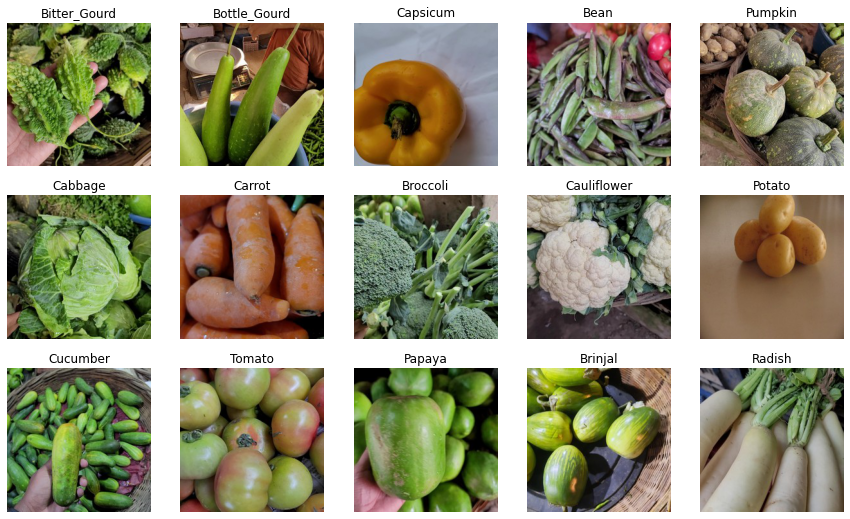

In [15]:
# Show an example image for each vegetable in the dataset
plt.figure(figsize=(15,9))
for i, folder in enumerate(os.listdir(train_dir)): 
    file_paths = gb.glob(pathname = str(val_dir +'//' + folder + '/*.jpg'))
    img_path = random.choice(file_paths) # randomly select an img from each class
    img = tf.keras.utils.load_img(img_path) # load image using keras utility function

    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(img)
    plt.title(folder)
    plt.axis("off")


In [16]:
# Shapes of training image and label ds
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32, 15)


#### Optimize Dataset for Performance

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### Standardize the Data

In [18]:
# Scale pixels to be within a range of [0,1]
normalization_layer = layers.Rescaling(1.0/255)

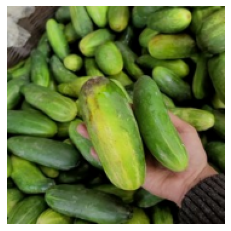

In [19]:
# Before standardizing
images, _ = next(iter(train_ds))
ex_img = images[0]

img = plt.imshow(ex_img.numpy().astype("uint8"))
plt.axis('off')
plt.show(img)

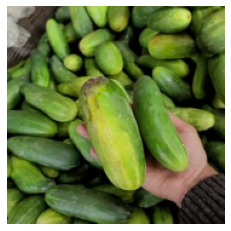

0.0 0.92457813


In [20]:
# after standardizing - looks good!
normalized_img = normalization_layer(ex_img)
normalized_img
img = plt.imshow(normalized_img)
plt.axis('off')
plt.show(img)
# Notice the pixel values are now between [0,1]
print(np.min(normalized_img), np.max(normalized_img))

In [21]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


## **Create the Model**

To combat overfitting we're going to do a couple things. 
*  **First**, we're going to generate additinal training data from existing examples by augmenting them using random transformations of existing images. This is done by randomly rotating the image and altering the contrast. 
*  **Second**, we're going to implement dropout layers in our CNN model.Applying dropout to a layer randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.


#### Data Augmentation

In [22]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

#### Design Model Architecture

In [42]:
num_classes = len(class_names)

# MODEL 1: Standard CNN without dropout
# model = Sequential([
#     layers.Input(shape=(img_height, img_width, 3)),
#     normalization_layer,        # Normalization
#     data_augmentation,          # Augmentation
#     # layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#     layers.Conv2D(16, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(num_classes, activation='sigmoid')
# ])

# MODEL 2: CNN with dropout to reduce overfitting

model = Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    normalization_layer,        # Normalization
    data_augmentation,
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    # layers.GlobalAveragePooling2D(), # Alternative to Flatten() to reduce num of parameters & mitigate overfitting
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [43]:
# Print out a model summary
model.summary()
# tf.keras.utils.plot_model(model, to_file="cnn_model.png", show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 32)        18464     
                                                      

In [44]:
# Compiles the model
# > Using categorical crossentropy because our labels are one-hot encoded
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train the Model

In [37]:
# Early-stopping callback to reduce overfitting
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", 
    patience=5, 
    restore_best_weights=True
)

In [45]:
epochs=25 # number of times the training will apply the entire dataset
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = [early_stopping_callback]
)

Epoch 1/25


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


469/469 [==============================] - 60s 126ms/step - loss: 1.9746 - accuracy: 0.3185 - val_loss: 1.2857 - val_accuracy: 0.5697
Epoch 2/25
469/469 [==============================] - 59s 125ms/step - loss: 1.0959 - accuracy: 0.6338 - val_loss: 0.8485 - val_accuracy: 0.7113
Epoch 3/25
469/469 [==============================] - 58s 125ms/step - loss: 0.7772 - accuracy: 0.7459 - val_loss: 0.7721 - val_accuracy: 0.7260
Epoch 4/25
469/469 [==============================] - 58s 123ms/step - loss: 0.5898 - accuracy: 0.8087 - val_loss: 0.4365 - val_accuracy: 0.8640
Epoch 5/25
469/469 [==============================] - 58s 124ms/step - loss: 0.4820 - accuracy: 0.8413 - val_loss: 0.3820 - val_accuracy: 0.8787
Epoch 6/25
469/469 [==============================] - 58s 123ms/step - loss: 0.4172 - accuracy: 0.8665 - val_loss: 0.3475 - val_accuracy: 0.8917
Epoch 7/25
469/469 [==============================] - 57s 123ms/step - loss: 0.3490 - accuracy: 0.8880 - val_loss: 0.3081 - val_accuracy: 0.9

#### Training Results

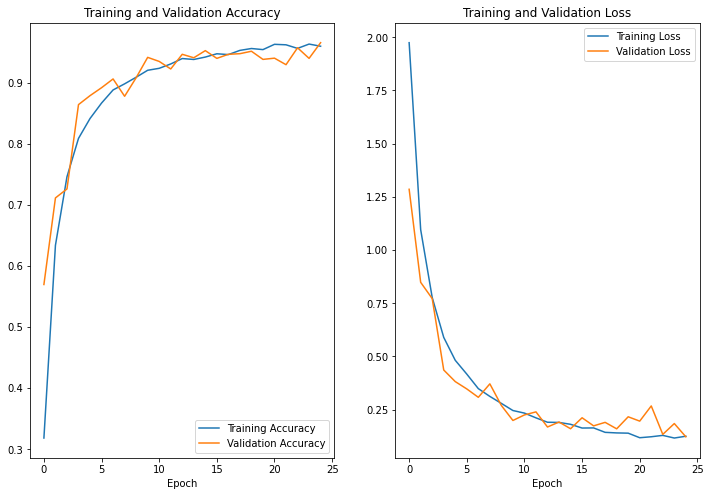

In [64]:
# Visualize accuracy and loss of training vs validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

As you can see, there is minimal overfitting, training and validation accuracy & loss are closely aligned. An indicator of overfitting woule be if validation accuracy or loss stalls out while training accuracy continues to improve. When this happens it's good practice to reduce the number of epochs, add dropout layers to the model, or try to make the training set more diverse. In fact, we should probably run this model for more epochs to test how far we could go before overfitting (and we could probably increase performance) but Google Colab is limiting my RAM so more epochs will probably crash the runtime. 🤷

## Model Results

In [47]:
# Testing accuracy
scores = model.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {'%.2f%%' % (scores[1]*100)}")

Test Accuracy: 96.73%


94/94 [==============================] - 5s 46ms/step


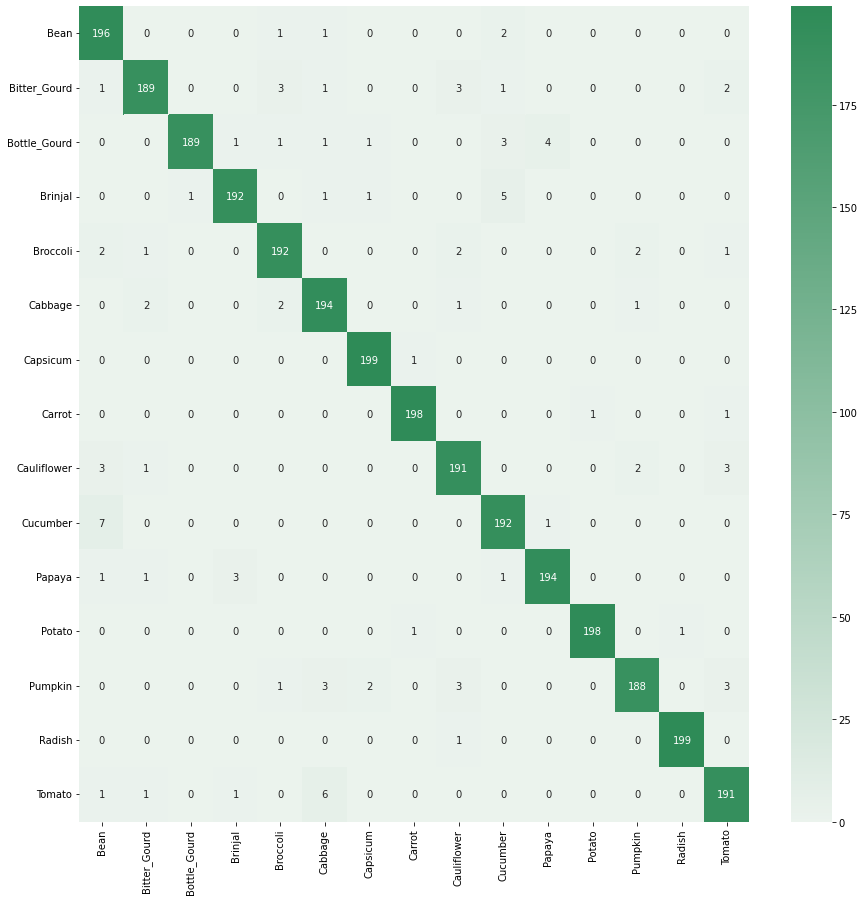

In [49]:
# Confusion Matrix
def confusion_matrix(model, ds, label_list):
# Note: This logic doesn't work with shuffled datasets
    plt.figure(figsize=(15,15))
    y_pred = model.predict(ds)
    predicted_categories = tf.argmax(y_pred, axis=1)
    true_categories = tf.concat([tf.argmax(y, axis=1) for x, y in ds], axis=0)
    cm = metrics.confusion_matrix(true_categories, predicted_categories) # last batch 
    my_colors=sns.light_palette("seagreen", as_cmap=True)
    sns.heatmap(cm, annot=True, xticklabels=label_list, yticklabels=label_list, cmap=my_colors, fmt='g')
    plt.show()

confusion_matrix(model, test_ds, class_names)

94/94 [==============================] - 4s 43ms/step


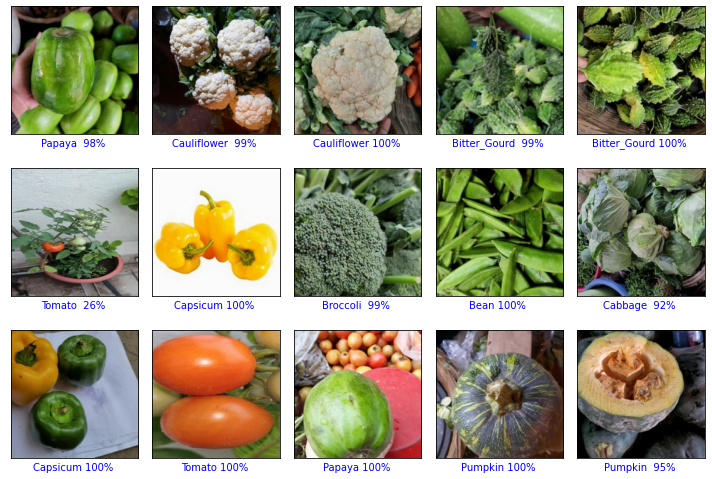

In [62]:
# Functions for class-specific accuracies
def plot_image(pred_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.numpy().astype("uint8"))

    pred_label = np.argmax(pred_array)
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    # Labels will be red if the prediction is incorrect, blue otherwise
    plt.xlabel("{} {:3.0f}% ".format(class_names[pred_label],
                                    100*np.max(pred_array),
                                    ),
                                    color=color)

def plot_predictions(model):
    true_categories = tf.concat([tf.argmax(y, axis=1) for x, y in test_ds], axis=0)
    images = tf.concat([x for x, y in test_ds], axis=0)
    y_pred = model.predict(test_ds)
    # Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
    indices = random.sample(range(len(images)), 15)
    # Color correct predictions in blue and incorrect predictions in red.
    num_rows, num_cols = 3, 5
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*num_cols, int(2.5*num_rows)))
    for i, index in enumerate(indices):
        plt.subplot(num_rows, num_cols, i+1)
        plot_image(y_pred[index], true_categories[index], images[index])
    plt.tight_layout()
    plt.show()

plot_predictions(model)

#### Example Predictions

1/1 [==============================] - 0s 23ms/step


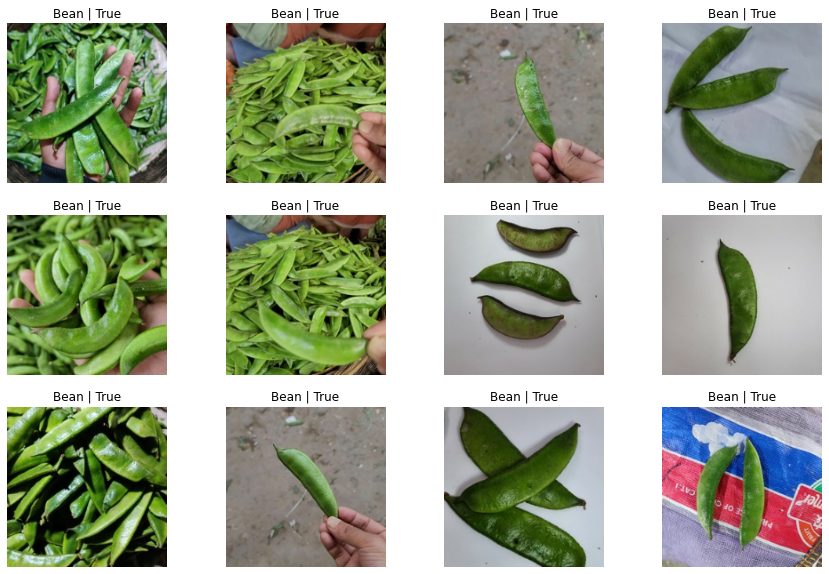

In [53]:
# Show the first 9 images in the trianing dataset and the predicted label
plt.figure(figsize=(15, 10))
for images, labels in test_ds.take(1):
    pred = model.predict(images)
    label_pred = np.argmax(pred, axis=1)
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        flag = str(label_pred[i] == np.argmax(labels[i]))
        plt.title(f"{class_names[label_pred[i]]} | {flag}") # Print out the predicted label, and whether it's right or not
        plt.axis("off")

From the results above, it's clear that this classifier is very effective at it's job. This type of classifier can be used for an infinite number of interesting applications from cancer detection to plant classification. The reason I chose to do this as my final project is because I'm interested in computer vision and have some idea that I could use it for in the future. Eventually, I want to use something like this to develop an app where you can take a picture of a Catan board and it will recommend you the best start locations. This is one of many potential applications.